<a href="https://colab.research.google.com/github/nickwan/nwds-stream-notebooks/blob/main/baseball_weird_shit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# font size

In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '24px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', increase_font)

# yo

In [ ]:
!pip install adjustText
!pip install pybaseball

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import HTML, display, clear_output
import warnings
import time
from adjustText import adjust_text
import pybaseball as bb
import datetime

<IPython.core.display.Javascript object>

In [ ]:
year = 2023
project_dir = 'drive/My Drive/baseball/data'
df = pd.read_csv(f"{project_dir}/{year}-data.csv")
df['game_date'] = pd.to_datetime(df['game_date'])
df.shape

<IPython.core.display.Javascript object>

(627246, 96)

# ballpark + pitching

In [ ]:
ids = [
    'pitcher',
    'pitcher_name',
    'home_team',
    'pitch_type'
]
rel = [
    'release_pos_x',
    'release_pos_z'
]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

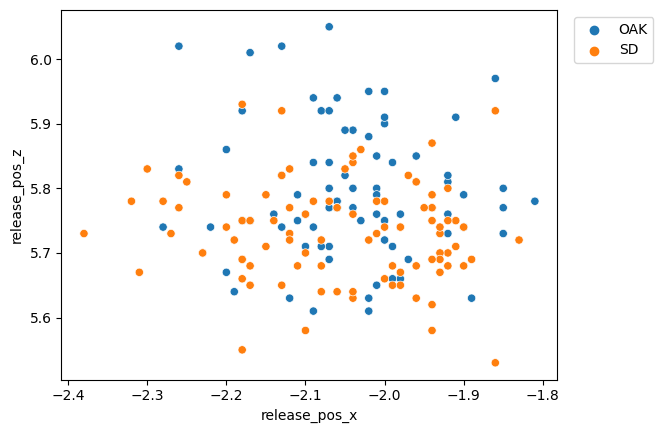

In [ ]:
sns.scatterplot(data=df.loc[(df['pitcher']==502171) & (df['home_team'].isin(['SD','LAA','LAD','OAK']))], x='release_pos_x', y='release_pos_z', hue='home_team')
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
plt.show()

In [ ]:
import re

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[]

In [ ]:
ccs = [
    ['32T3K', 765],
    ['T55J5', 684],
    ['KK677', 28],
    ['KTJJT', 220],
    ['QQQJA', 483],
]

flag = []
for hand,bet in ccs:
  if 'QQQ' in hand:
    flag.append(True)
  else:
    flag.append(False)

flag

<IPython.core.display.Javascript object>

[False, False, False, False, True]

In [ ]:
ccs

<IPython.core.display.Javascript object>

[['32T3K', 765], ['T55J5', 684], ['KK677', 28], ['KTJJT', 220], ['QQQJA', 483]]

# idk

In [ ]:
week_ago = df['game_date'].max() - pd.to_timedelta([7], unit='d')
week_ago = week_ago.strftime('%Y-%m-%d')[0]a
x = df.loc[df['game_date']>=week_ago, 'des']
x[x.str.len() == x.str.len().max()].values[0]

<IPython.core.display.Javascript object>

'Giants challenged (tag play), call on the field was overturned: Ronald Acuna Jr.  grounds into a double play, first baseman J.  D. Davis to pitcher Scott Alexander to second baseman Thairo Estrada to catcher Patrick Bailey.   Orlando Arcia out at home.    Ronald Acuna Jr.  out at 1st.'

In [ ]:
x[x.str.len() == x.str.len().max()].index

<IPython.core.display.Javascript object>

Int64Index([12779, 12780], dtype='int64')

In [ ]:
idx = 12779

<IPython.core.display.Javascript object>

In [ ]:
df.columns.values

<IPython.core.display.Javascript object>

array(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4',
       'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9',
       'release_pos_y', 'estim

In [ ]:
df.loc[[idx], ['game_date','game_pk', 'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'fielder_2.1', 'fielder_3', 'fielder_4',
       'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9']]

<IPython.core.display.Javascript object>

,game_date,game_pk,inning,inning_topbot,outs_when_up,balls,strikes,pitch_number,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9
12779,2023-08-27,716819,5,Top,1,0,1,2,672275,605204,642731,669477,657557,671218,596103,682641


In [ ]:
_df = df.loc[df['type']=='X', ['launch_speed', 'launch_angle', 'delta_run_exp']].copy()
for col in ['launch_speed', 'launch_angle']:
  _df[col] = _df[col].round()
_df = _df.groupby(['launch_speed', 'launch_angle'], as_index=False).mean()
_df1 = pd.DataFrame([[-1000,-1000,-_df['delta_run_exp'].abs().max()]], columns=['launch_speed', 'launch_angle', 'delta_run_exp'])
_df = pd.concat([_df,_df1], ignore_index=False)
_df.shape

<IPython.core.display.Javascript object>

(9873, 3)

In [ ]:

value_pct = (df
 .loc[(df['launch_speed'].between(df.loc[[idx], 'launch_speed'].values[0]-1,
                                  df.loc[[idx], 'launch_speed'].values[0]+1))
 & (df['launch_angle'].between(df.loc[[idx], 'launch_angle'].values[0]-3,
                               df.loc[[idx], 'launch_angle'].values[0]+3))
 & (df['spray_angle'].between(df.loc[[idx], 'spray_angle'].values[0]-3,
                               df.loc[[idx], 'spray_angle'].values[0]+3)),
      'delta_run_exp'])


out = f"""
In this season, this hit results
in negative run value
{(value_pct[value_pct<0].shape[0]-1)} out of {(value_pct.dropna().shape[0]-1)} times
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

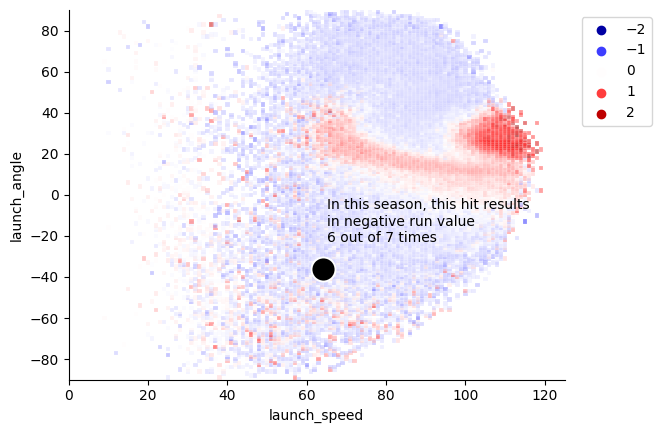

In [ ]:
sns.scatterplot(data=_df, x='launch_speed', y='launch_angle',
                hue='delta_run_exp', palette='seismic', marker='s',
                s=10, alpha=.5)

sns.scatterplot(data=df.loc[[idx]], x='launch_speed', y='launch_angle',
                marker='o', s=300, c='k')
texts = [plt.text(df.loc[[idx], 'launch_speed'].values[0],df.loc[[idx], 'launch_angle'].values[0],out)]

plt.xlim(0,125)
plt.ylim(-90,90)
adjust_text(texts)
plt.legend(bbox_to_anchor=(1.02,1), loc=2)
sns.despine()
plt.show()

In [ ]:
df.columns.values

<IPython.core.display.Javascript object>

array(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4',
       'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9',
       'release_pos_y', 'estim

In [ ]:
sprint_speed.loc[sprint_speed['player_id']==df.loc[[idx], 'on_3b'].values[0]]

<IPython.core.display.Javascript object>

,last_name,first_name,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
458,Arcia,Orlando,606115,144,ATL,SS,28,192,NaN,4.7,25.8


In [ ]:
sprint_speed.loc[sprint_speed['player_id']==df.loc[[idx], 'fielder_4'].values[0]]

<IPython.core.display.Javascript object>

,last_name,first_name,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
147,Estrada,Thairo,642731,137,SF,2B,27,148,NaN,4.33,28.2


In [ ]:
sprint_speed.loc[sprint_speed['player_id']==df.loc[[idx], 'batter'].values[0], '']

<IPython.core.display.Javascript object>

,last_name,first_name,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
181,Acuña Jr.,Ronald,660670,144,ATL,RF,25,227,16.0,4.33,28.0


In [ ]:
sprint_speed = bb.statcast_sprint_speed(year=2023)

<IPython.core.display.Javascript object>

In [ ]:
value_pct

<IPython.core.display.Javascript object>

12779    -0.317
41495     0.950
99265    -0.199
164339   -0.212
165092   -0.169
310108   -0.338
490016   -0.091
537720   -0.232
588673      NaN
Name: delta_run_exp, dtype: float64

In [ ]:
df.loc[[41495], ['game_date','game_pk', 'inning', 'inning_topbot', 'batter', 'outs_when_up', 'balls', 'strikes', 'pitch_number', 'fielder_2.1', 'fielder_3', 'fielder_4',
       'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9']]

<IPython.core.display.Javascript object>

,game_date,game_pk,inning,inning_topbot,batter,outs_when_up,balls,strikes,pitch_number,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9
41495,2023-08-19,716937,4,Bot,663538,1,1,1,3,666023,521692,686681,622110,677951,669392,671221,680118


In [ ]:
df.loc[[41495], 'if_fielding_alignment']

<IPython.core.display.Javascript object>

41495    Standard
Name: if_fielding_alignment, dtype: object

In [ ]:
df.loc[[idx], 'if_fielding_alignment']

<IPython.core.display.Javascript object>

12779    Strategic
Name: if_fielding_alignment, dtype: object

In [ ]:
bb.sta

In [ ]:
fld = bb.statcast_fielding.statcast_outs_above_average(year=2023, pos=4)
fld.head()

<IPython.core.display.Javascript object>

,last_name,first_name,player_id,display_team_name,year,primary_pos_formatted,fielding_runs_prevented,outs_above_average,outs_above_average_infront,outs_above_average_lateral_toward3bline,outs_above_average_lateral_toward1bline,outs_above_average_behind,outs_above_average_rhh,outs_above_average_lhh,actual_success_rate_formatted,adj_estimated_success_rate_formatted,diff_success_rate_formatted
0,Albies,Ozzie,645277,Braves,2023,2B,-2,-3,-1,-5,2,0,-4,1,78%,78%,0%
1,Altuve,Jose,514888,Astros,2023,2B,0,0,0,1,0,-1,-1,1,68%,68%,0%
2,Andrus,Elvis,462101,White Sox,2023,2B,1,2,0,-1,3,-1,1,1,71%,70%,1%
3,Arraez,Luis,650333,Marlins,2023,2B,-7,-9,-8,-1,-2,1,-4,-5,75%,77%,-2%
4,Arroyo,Christian,624414,Red Sox,2023,2B,-1,-2,0,0,-2,1,-1,-1,78%,79%,-1%
